## Import

In [24]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pycaret.clustering import *

## Loading and Preprocessing Data

In [25]:
# Load the data from the CSV file
data = pd.read_csv(f"{os.getcwd()}/../data/video_features.csv")

# Pre-process
data['shot_durations'].fillna(data['duration'], inplace=True)
data['class'] = pd.cut(data['viewCount'], bins=[-1, 1000, 10000, 100000, 1000000, float("inf")], labels=["Very Low", "Low", "Medium", "High", "Very High"])

data

,id,title,description,viewCount,likeCount,commentCount,duration,total_frames,shot_durations,num_shots,shot_duration_variance,average_shot_duration,class
0,IKyUzFtWiKs,Funny Animal Videos 2022 Best Dogs And Cats V...,Try Not To Laugh Challenge is a hilarious comp...,137501,7801,0,46.0,1354,6.2667 5.5333 16.0333 0.9333 4.7 11.6333,6,29.250040,7.5166,High
1,G_BGoHEKrio,***MUST SEE!!!*** Cute Baby Animals!!!,Compilation of cute Baby Animals of TikTok! Ch...,3375296,232721,0,60.0,1784,0.1667 0.8333 11.0 4.0 4.3333 5.4667 2.2 3.533...,14,10.200439,4.2452,Very High
2,EjOvitXzqlI,Funniest Animal Videos 2022 🤣// Best Animal Vi...,Funniest Animal Videos of 2022... Cats and Dog...,4671280,108299,0,30.0,882,2.4667 3.3333 4.0333 2.8 2.7 5.0 8.2333 0.8,8,4.888655,3.6708,Very High
3,LGDgFXBEwQA,Cute dog moments | funny dog videos in Bengali...,"dog videos\\, funny videos\\, funny dog videos...",11997064,846751,0,59.0,1770,10.3333 11.6667 2.4667 4.2667 7.1667 7.6667 5....,11,11.647061,5.3606,Very High
4,xR8WBFCfrl0,Cute dog moments | Part-185| funny dog videos ...,"Cute dog moments part-185|\\,dog videos\\, fun...",374963,18732,0,60.0,1779,8.7 13.5 7.0 5.4333 0.9333 1.8333 2.6667 0.733...,12,15.487539,4.9389,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6059,3ABwlVqCxqk,DRL Vegas Championship Course Build Timelapse,Watch the DRL Vegas Championship presented by ...,2013,53,0,50.0,1478,0.7007 1.1011 11.2779 7.4741 6.4398 8.4418 2.1...,12,13.259093,4.1069,Low
6060,uJbqqyvydCo,Diving Down The Tallest Building In The World ...,NaN,7730098,276146,0,30.0,869,30.0,1,0.000000,0.0000,Very High
6061,p1b4dDfvRnA,Full Send Friday | FPV Drone Freestyle (🎥: IG ...,NaN,20407294,404542,0,11.0,316,11.0,1,0.000000,0.0000,Very High
6062,86uQ4HT24xM,FPV Drone Freestyle (🎥: IG / billyboy_fpv),NaN,11404839,336744,0,9.0,267,9.0,1,0.000000,0.0000,Very High


## Visualizing Correlation

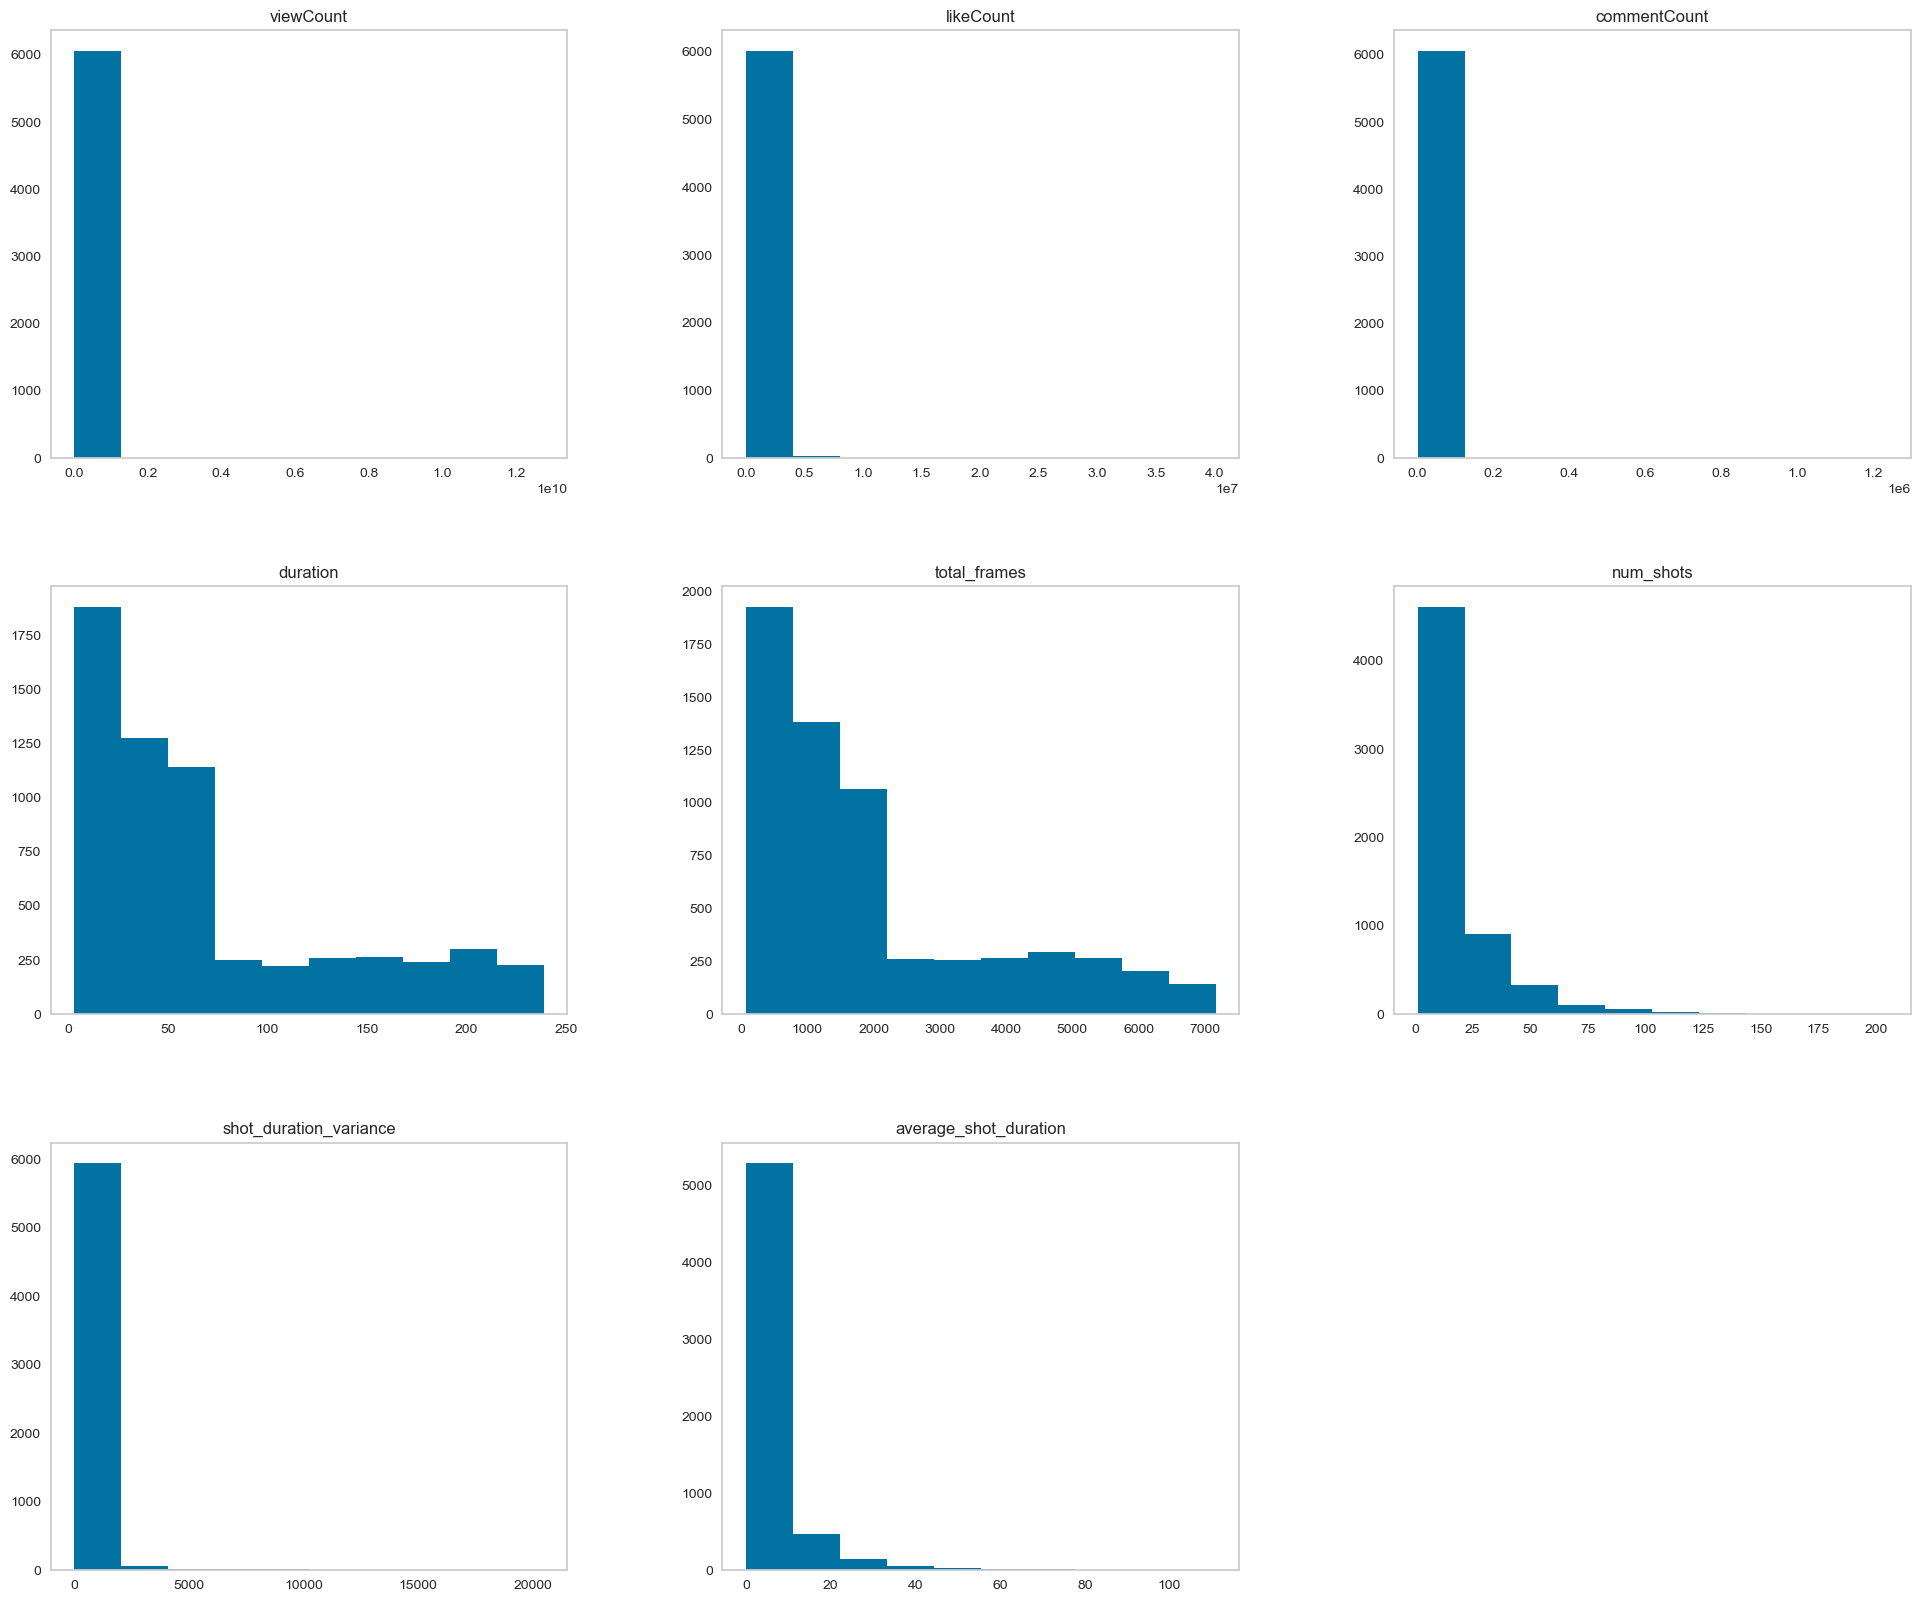

178.34238896844485


<AxesSubplot:xlabel='shot_duration_variance', ylabel='Count'>

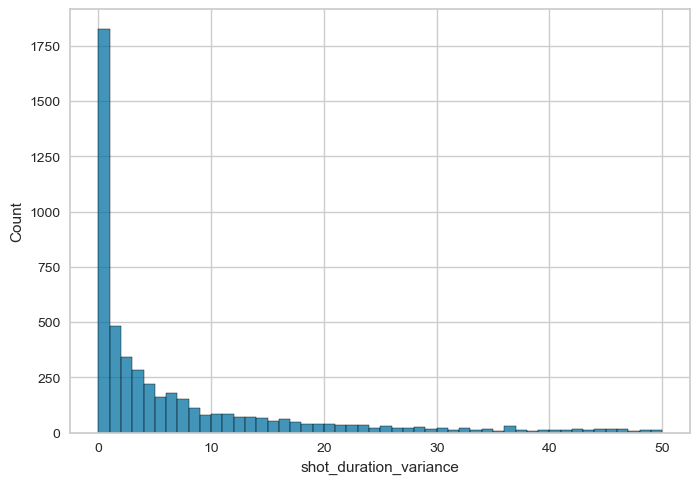

In [26]:
data.hist(bins = 10, figsize = (24,20), grid = False)
plt.show()

print(np.mean(data['shot_duration_variance']))

sns.histplot(data['shot_duration_variance'], binrange=[0,50], bins = 50)


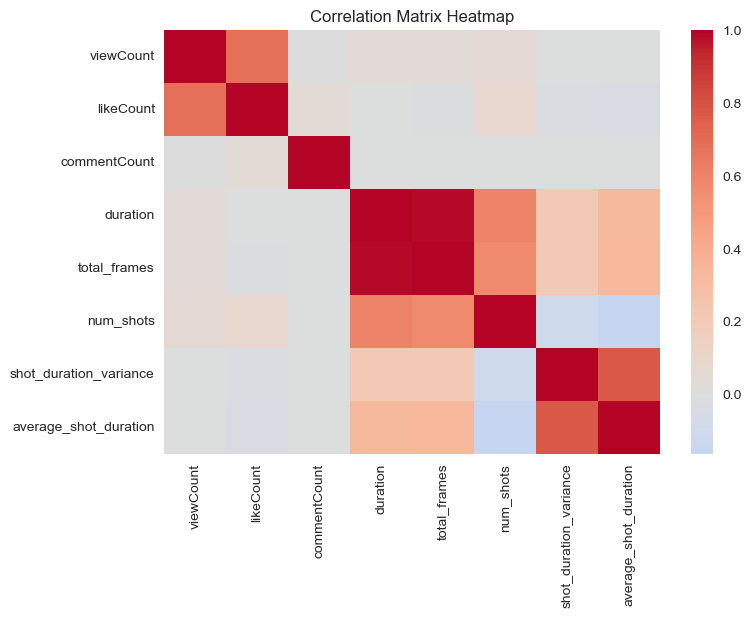

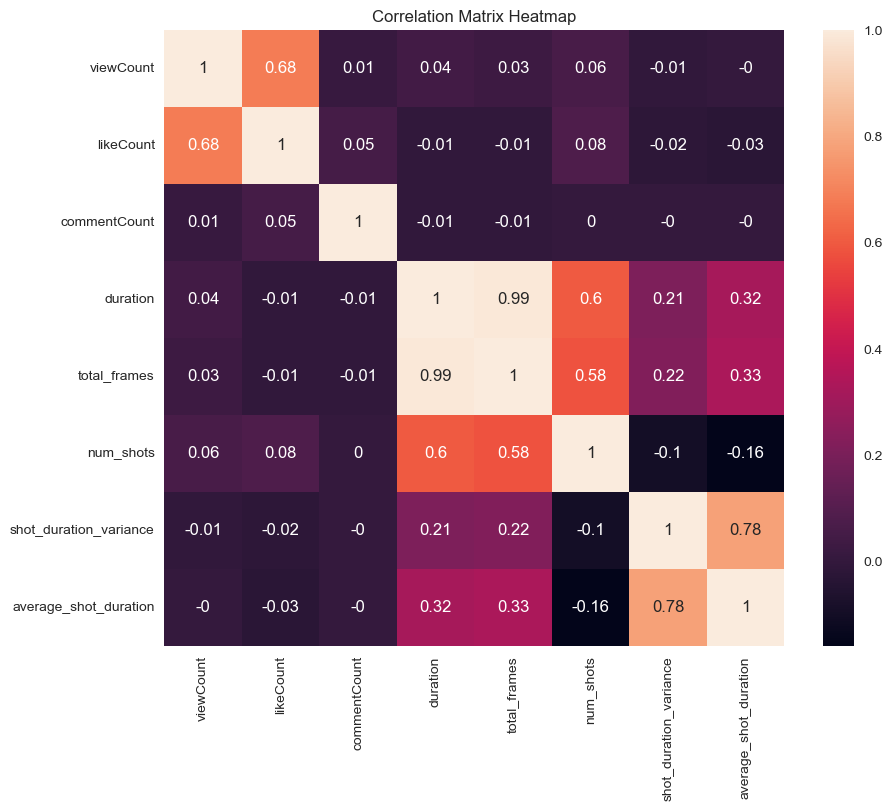

In [27]:
# Correlation matrix heatmap
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix Heatmap')
sns.heatmap(data.corr().round(decimals=2), annot=True,)
plt.show()

In [38]:
# Initialize the setup
setup(data, normalize=True, remove_outliers=True, low_variance_threshold=0.3)


In [49]:
# Create the model using the best algorithm
best = create_model("kmeans", num_clusters=5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:50:06
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5272,2276.4390,0.8138,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

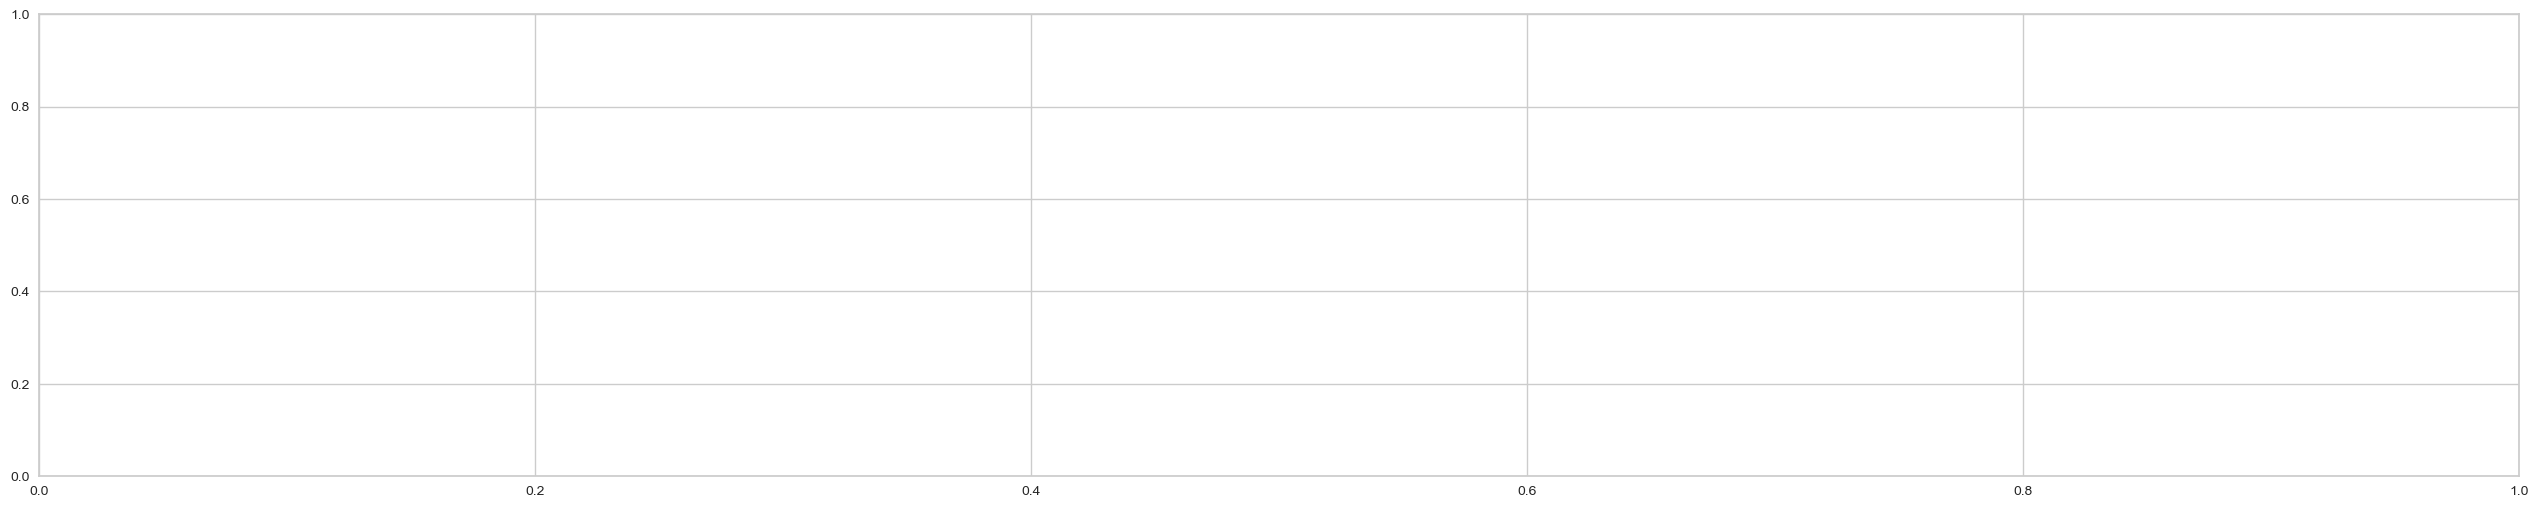

In [50]:
evaluate_model(best)